In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        residuals = y - self.initial_prediction

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions
            self.models.append(tree)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.models:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

# Example usage
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

model = GradientBoostingRegressorScratch(n_estimators=100, learning_rate=0.1, max_depth=10)
model.fit(X, y)
predictions = model.predict(X)
print("Predictions:", predictions)


Predictions: [1.00005312 2.00002656 3.         3.99997344 4.99994688]


Accuracy: 0.89


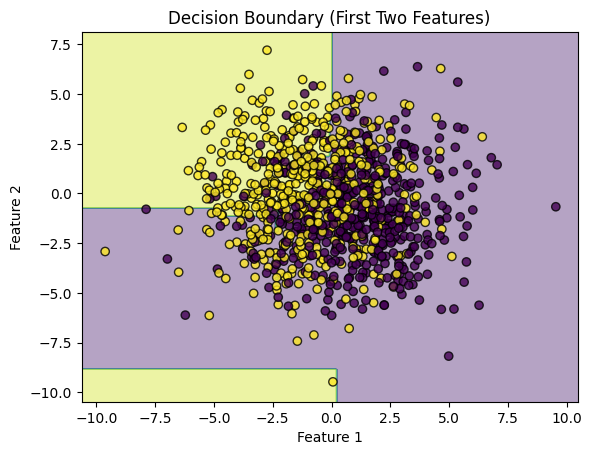

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



# plot the decision boundary
import matplotlib.pyplot as plt

# To visualize the decision boundary, you'll need to project the 20-dimensional data
# onto a 2D plane. Techniques like PCA or t-SNE can be used for this.
# Here's a simplified example using only the first two features for visualization:

# Plot the decision boundary (using only the first two features)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a dataset for prediction using only the first two features
X_grid = np.c_[xx.ravel(), yy.ravel()]
# Pad the X_grid to match the number of features expected by the model
X_grid_padded = np.pad(X_grid, ((0, 0), (0, 18)))  # Pad with zeros to reach 20 features

Z = gb_clf.predict(X_grid_padded)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='k')
plt.title('Decision Boundary (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



Mean Squared Error: 3363.66


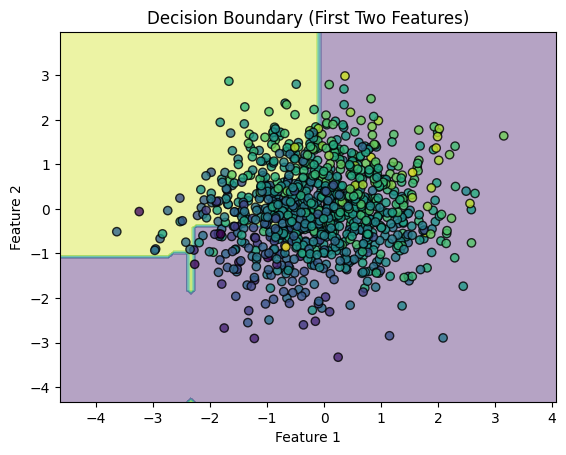

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



# plot the decision boundary
import matplotlib.pyplot as plt

# To visualize the decision boundary, you'll need to project the 20-dimensional data
# onto a 2D plane. Techniques like PCA or t-SNE can be used for this.
# Here's a simplified example using only the first two features for visualization:

# Plot the decision boundary (using only the first two features)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a dataset for prediction using only the first two features
X_grid = np.c_[xx.ravel(), yy.ravel()]
# Pad the X_grid to match the number of features expected by the model
X_grid_padded = np.pad(X_grid, ((0, 0), (0, 18)))  # Pad with zeros to reach 20 features

Z = gb_clf.predict(X_grid_padded)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='k')
plt.title('Decision Boundary (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

df = pd.DataFrame(X, columns=california.feature_names)
df['target'] = y


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on California Housing Dataset: {mse:.2f}")


Mean Squared Error on California Housing Dataset: 0.22


In [ ]:

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# predict the target values for the test set
y_pred = gb_reg.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# predictions use only 3 digits after the decimal point
y_pred = np.round(y_pred, 3)
print('Predictions:', y_pred)

# Create a new DataFrame for predictions
# Use a simple range index as X_test doesn't have one
df_pred = pd.DataFrame({'predictions': y_pred}, index=range(len(y_pred)))

# Assuming 'df' is your original DataFrame with features and target
# Reset its index to be a simple range index for joining
df = df.reset_index(drop=True)

# Join the predictions with the original DataFrame, specifying suffixes
df = df.join(df_pred, how='left', lsuffix='_original', rsuffix='_predicted') # Add suffixes here

Mean Squared Error: 0.21842357434901546
Predictions: [0.486 1.003 4.576 ... 2.065 1.394 2.05 ]


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,predictions_original,predictions_predicted,predictions
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.486205,0.486,0.486
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.003373,1.003,1.003
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4.576450,4.576,4.576
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.446231,2.446,2.446
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.386561,2.387,2.387


# Hyper parmeter tuning

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset (for example purposes)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the GradientBoostingClassifier
model = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['log_loss']
}

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
# cv = 5 means 5-fold cross-validation
# verbose = 1 means print progress
# n_jobs = -1 means use all available CPU cores

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the final model on the test set
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_score}")


Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
